<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab9_Spatial_Filtering_Basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1- Unsharp masking**

In [ ]:
#necessary imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math

'''
Box Filter
'''

#function which takes input numpy array of image and size and returns a smoothened and filtered image
def box_filter(img, size):
  fimg = img.copy() #make a copy of input image
  padding = (size-1)//2 #find size of padding at each sides
  kernel = np.ones((size,size),np.float32)/(size**2) #define a kernel to be applied over the image
  row,col = img.shape[:2] #find and store shape of image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) # add zero padding at each side

  #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      fimg[i,j]= np.multiply(kernel, region).sum() # apply the filter on the region and store output in the particular pixel
  return fimg  #return the final filtered numpy array of the image

'''
Gaussian Filter
'''

#function to calculate gaussian value with standard deviation and x and y radius
def gaussian(radius1,radius2, sd):
  den = 2 * math.pi * (sd**2) #calculate denominator value
  num =  math.e ** (-(((radius1**2) + (radius2**2)) /(2 * (sd**2)))) ##calculate numerator value
  return num/den # return final calculated value

#function which takes input array of image, size, standard deviation and returns gaussian filtered array of image
def gaussian_filter(img, size, sd):
  fimg = img.copy() #make a copy of input image
  kernel = np.ones((size,size), np.float32) #create a kernel with given size to be filed later
  padding = (size-1)//2 #find size of padding at each sides

  #use double for loop to access each pixel in kernel  
  for k in range(size):
      for l in range(size):
        x = abs(k - padding) #vertical distance from oriigin
        y = abs(l - padding) #horizontal distance from origin
        kernel[k,l] = (gaussian(x,y, sd)) #store values in kernel

  kernel = kernel/ kernel.sum()#normalizing factor

  row,col = img.shape[:2] #store shape of input image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) #add zero padding at each sides of input image
 
  #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      fimg[i,j]= np.multiply(kernel, region).sum() # apply the filter on the region and store output in the particular pixel
  return fimg  #return the final filtered numpy array of the image



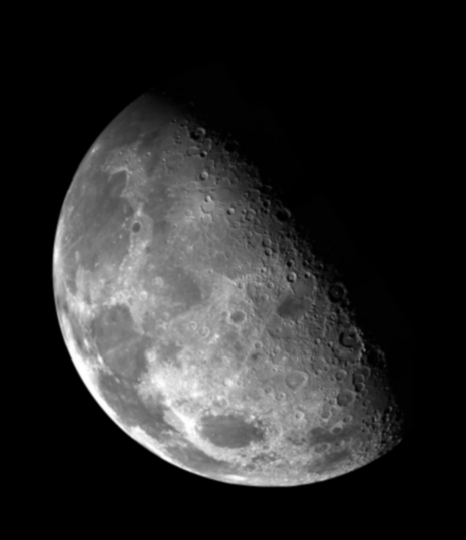

In [ ]:
#function which performs unsharp masking with gaussian filter
def unsharp_mask_gf(image, size=3, sigma=1.4, k=0.2):
    blurred =  gaussian_filter(image, size, sigma) # blurs the image
    mask = image - blurred  # obtains the mask containh high frequency components
    sharpened = image + (k * mask) # adds enchanced edges to original image to obtain sharpened image
    return sharpened

#inputs image
input = cv2.imread('unsharpmasking.tif',0)

#output image with different k values
output1 = unsharp_mask_gf(input, k = 0.2)
output2 = unsharp_mask_gf(input, k = 0.6)

Image.fromarray(input)

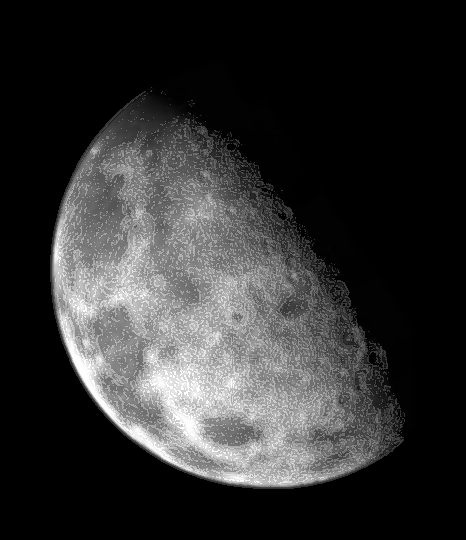

In [ ]:
Image.fromarray(output1).convert("L")

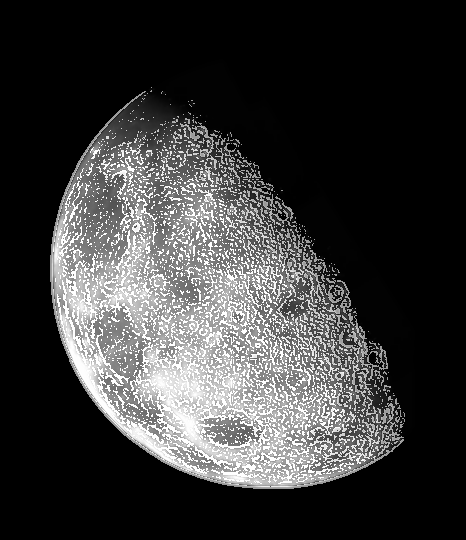

In [ ]:
Image.fromarray(output2).convert("L")

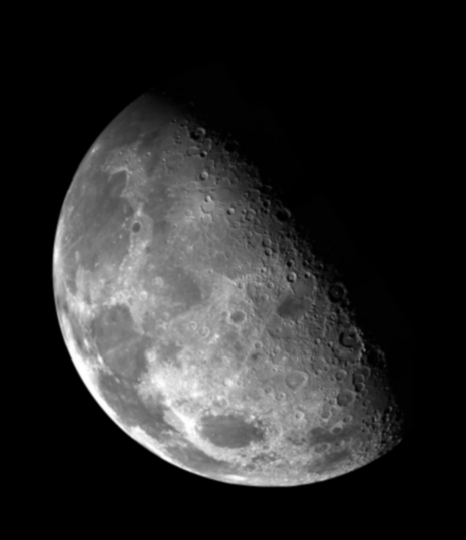

In [ ]:
#function which performs unsharp masking with box filter
def unsharp_mask_bf(image, size=3, k=0.2):
    blurred =  box_filter(image, size)
    mask = image - blurred  # obtains the mask containh high frequency components
    sharpened = image + (k * mask) # adds enchanced edges to original image to obtain sharpened image
    return sharpened

#inputs image
input = cv2.imread('unsharpmasking.tif',0)

#outpuuts image with different k values
output3 = unsharp_mask_bf(input, k = 0.2)
output4 = unsharp_mask_bf(input, k = 0.6)

Image.fromarray(input)

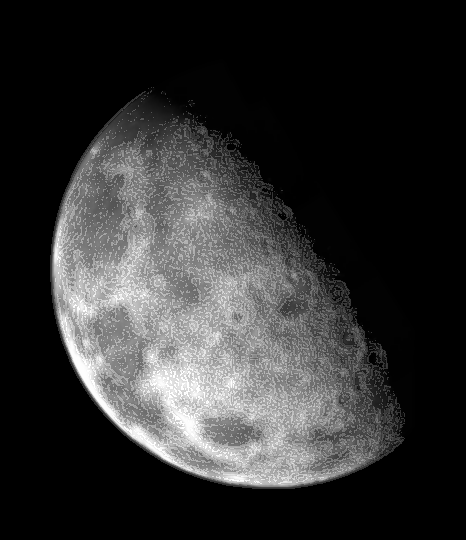

In [ ]:
Image.fromarray(output3).convert("L")

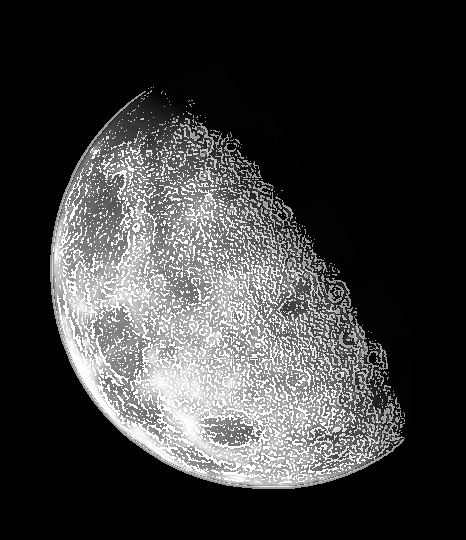

In [ ]:
Image.fromarray(output4).convert("L")

# **Task 2-Remove salt and pepper noise**

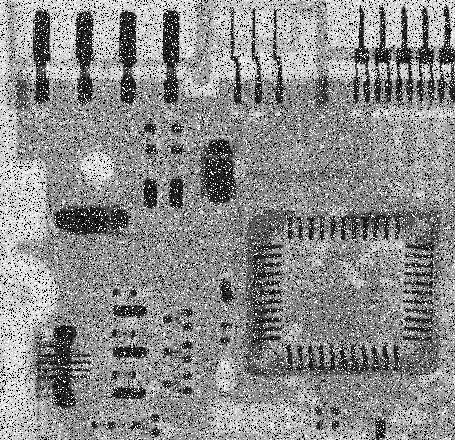

In [ ]:
#necessary imports
import cv2
import numpy as np
from PIL import Image

#function which takes input numpy array of image and size and removes salt and pepper noise
def median_filter(img, size):
  fimg = img.copy() #make a copy of input image
  padding = (size-1)//2 #find size of padding at each sides
  kernel = np.ones((size,size),np.float32)/(size**2) #define a kernel to be applied over the image
  row,col = img.shape[:2] #find and store shape of image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) # add zero padding at each side

  #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      fimg[i,j]= np.median(region.flatten()) # apply the median filter using np.median and stores median value
  return fimg  #return the final filtered numpy array of the image

#read image into input
input2 = cv2.imread('saltandpaper.tif', cv2.IMREAD_GRAYSCALE)
#store output image arrays
output5 = median_filter(input2, 3)
output6 = median_filter(input2, 5)

Image.fromarray(input2).convert('L')

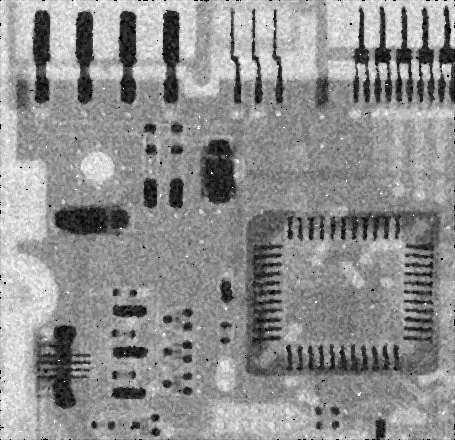

In [ ]:
Image.fromarray(output5).convert('L')

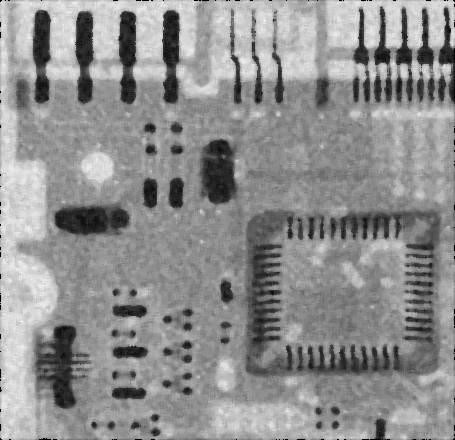

In [ ]:
Image.fromarray(output6).convert('L')

# **Task 3- Sharpening filters**

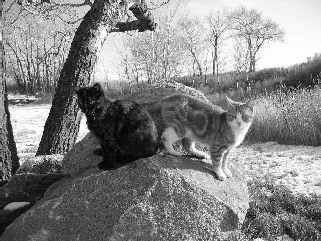

In [ ]:
#function which inputs image and a kernel and performs weighted averaging and returns output
def weighted_average(img, kernel):
  fimg = (img.copy()).astype(np.float64) #make a copy of input image
  size = kernel.shape[1] #since both sides of kernel are same, use either side
  padding = (size-1)//2 #find size of padding at each sides
  row,col = img.shape[:2] #find and store shape of image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) # add zero padding at each side

 #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      val = np.multiply(kernel, region).sum()
      fimg[i,j]= val # apply the filter on the region and store output in the particular pixel
  return fimg  #return the final filtered numpy array of the image

#use sobel operator to extract horizontal and vertical edges
h_kernel = np.array([
                [-1, -2, -1],
                [ 0,  0,  0],
                [ 1,  2,  1]
                ])

v_kernel = np.array([
                [-1,  0,  1],
                [-2,  0,  2],
                [-1,  0,  1]
                ]) 

#inputs image
input3 = cv2.imread('two_cats.jpg', cv2.IMREAD_GRAYSCALE)

#store output arrays from function
output7 = weighted_average(input3, h_kernel)
output8 = weighted_average(input3, v_kernel)

#calculates magnitues using horizontal and vertical gradient
output9 = (np.sqrt((output7 ** 2) + (output8 ** 2)))
output9 *= 255.0 / np.max(output9) #normalization factor

Image.fromarray(input3).convert('L')

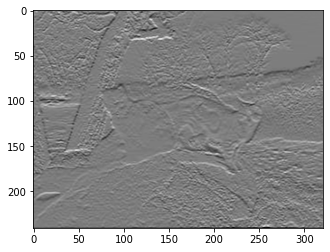

In [ ]:
plt.figure()
plt.imshow(output7, cmap=plt.cm.gray)    

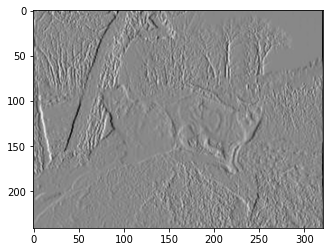

In [ ]:
plt.figure()
plt.imshow(output8, cmap=plt.cm.gray)    

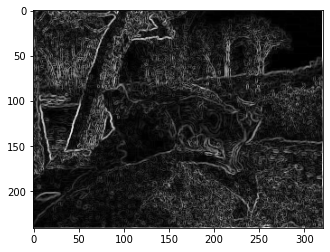

In [ ]:
plt.figure()
plt.imshow(output9, cmap=plt.cm.gray)    

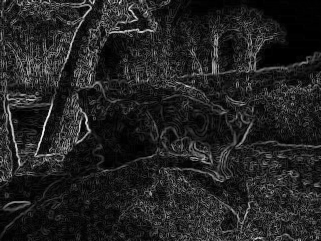

In [ ]:
import scipy
from scipy import ndimage

im = input3.astype('int32')
dx = ndimage.sobel(im, 0)  # horizontal derivative
dy = ndimage.sobel(im, 1)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)
Image.fromarray(mag).convert('L')

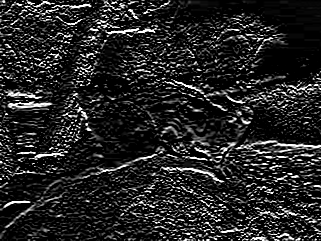

In [ ]:
Image.fromarray(dx).convert('L')

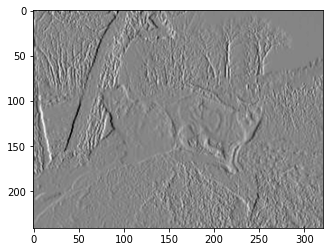

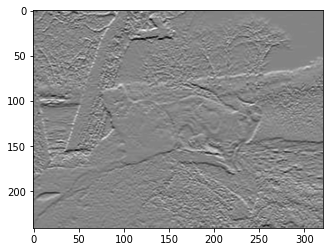

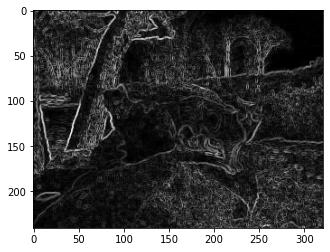

In [ ]:
from scipy import signal

def sobel_filter(im, k_size):

    im = im.astype(np.float)
    width, height = im.shape
    img = im

    assert(k_size == 3 or k_size == 5);

    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)

    gx = signal.correlate2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
    plt.figure()
    plt.imshow(gx, cmap=plt.cm.gray)  
    gy = signal.correlate2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)
    plt.figure()
    plt.imshow(gy, cmap=plt.cm.gray)  

    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)

    plt.figure()
    plt.imshow(g, cmap=plt.cm.gray)    

sobel_filter(input3, 3)  


In [ ]:
plt.figure()
plt.imshow(gy, cmap=plt.cm.gray)    